In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import scipy.linalg
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import chisquare

In [42]:
data = pd.read_excel(r'/Users/apple/Desktop/MATH7241 Probability 1/Project/Beijing PM2.5 Data Set (Clean).xlsx')

In [43]:
data

,pm2.5
0,129
1,148
2,159
3,181
4,138
5,109
6,105
7,124
8,120
9,132


In [44]:
# function to map the value of PM2.5 to the state: 1, 2, 3, 4, 5, 6, 7, 8 which represents the air quality level 
def mapStates(num):
    if num >= 0 and num <= 12:
        state = 1
    if num >= 13 and num <= 35:
        state = 2
    if num >= 36 and num <= 55:
        state = 3
    if num >= 56 and num <= 150:
        state = 4
    if num >= 151 and num <= 250:
        state = 5
    if num >= 251 and num <= 350:
        state = 6
    if num >= 351 and num <= 500:
        state = 7
    if num >= 501:
        state = 8
    return state
    

In [45]:
data['State'] = data['pm2.5'].apply(mapStates)

In [46]:
data

,pm2.5,State
0,129,4
1,148,4
2,159,5
3,181,5
4,138,4
5,109,4
6,105,4
7,124,4
8,120,4
9,132,4


In [47]:
# Count the time spent in each state
countSeries = data.groupby('State')['State'].count()
countSeries

State
1     3387
2     8733
3     5003
4    15643
5     5938
6     2059
7      869
8      125
Name: State, dtype: int64

In [48]:
num_row = len(data)
list_frac = []

# Calculate the fraction of time spent in each state
def count_fraction():
    for index, state in enumerate(countSeries.index.tolist()):
        list_frac.append(countSeries[state]/num_row)
    return list_frac

count_fraction()
print(list_frac)
   

[0.08111214886126877, 0.2091385875422085, 0.11981224704839907, 0.3746198242210887, 0.14220370237325478, 0.04930909787580525, 0.020810882007807074, 0.002993510070167876]


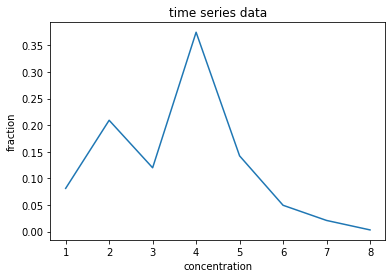

In [49]:
# Draw out the empirical distribution from time series
plt.plot(countSeries.index.tolist(), list_frac)
plt.xlabel("concentration")
plt.ylabel("fraction")
plt.title("time series data")
plt.show()

In [50]:
# Calculate the jumps (one step) between each states 
def jumpsBetween():
    pair_states = tuple(zip(data['State'], data['State'].iloc[1:]))
    my_dic = {i: pair_states.count(i) for i in pair_states}
    return my_dic

jumpsBetween()

{(4, 4): 13520,
 (4, 5): 870,
 (5, 5): 4706,
 (5, 4): 819,
 (4, 3): 1007,
 (3, 4): 1133,
 (4, 2): 212,
 (2, 2): 6697,
 (2, 3): 991,
 (3, 2): 875,
 (3, 3): 2968,
 (5, 6): 361,
 (6, 5): 328,
 (2, 1): 907,
 (1, 1): 2442,
 (1, 2): 925,
 (4, 6): 17,
 (6, 6): 1544,
 (6, 7): 144,
 (7, 7): 683,
 (7, 5): 15,
 (5, 7): 7,
 (7, 6): 135,
 (6, 4): 33,
 (2, 4): 130,
 (3, 5): 6,
 (5, 2): 21,
 (7, 8): 34,
 (8, 8): 86,
 (8, 3): 1,
 (3, 1): 21,
 (5, 8): 2,
 (8, 7): 33,
 (6, 8): 2,
 (8, 5): 5,
 (2, 5): 6,
 (5, 3): 19,
 (1, 3): 12,
 (4, 1): 14,
 (1, 4): 5,
 (7, 4): 2,
 (6, 2): 3,
 (2, 6): 2,
 (5, 1): 3,
 (6, 3): 5,
 (1, 5): 2,
 (4, 7): 2,
 (4, 8): 1}

In [51]:
#number of frequency of each state
x1 = 3386
x2 = 8733
x3 = 5003
x4 = 15643
x5 = 5938
x6 = 2059
x7 = 869
x8 = 125

# Transition Matrix Rows
r1 = [2442/x1, 925/x1, 12/x1, 5/x1, 2/x1, 0, 0, 0]
r2 = [907/x2, 6697/x2, 991/x2, 130/x2, 6/x2, 2/x2, 0, 0]
r3 = [21/x3, 875/x3, 2968/x3, 1133/x3, 6/x3, 0, 0, 0]
r4 = [14/x4, 212/x4, 1007/x4, 13520/x4, 870/x4, 17/x4, 2/x4, 1/x4]
r5 = [3/x5, 21/x5, 19/x5, 819/x5, 4706/x5, 361/x5, 7/x5, 2/x5]
r6 = [0, 3/x6, 5/x6, 33/x6, 328/x6, 1544/x6, 144/x6, 2/x6]
r7 = [0, 0, 0, 2/x7, 15/x7, 135/x7, 683/x7, 34/x7]
r8 = [0, 0, 1/x8, 0, 5/x8, 0, 33/x8, 86/x8]

#Transition Matrix
np.set_printoptions(precision = 4, suppress = True)
transition_matrix = np.array([r1, r2, r3, r4, r5, r6, r7, r8])
print(transition_matrix)



[[0.7212 0.2732 0.0035 0.0015 0.0006 0.     0.     0.    ]
 [0.1039 0.7669 0.1135 0.0149 0.0007 0.0002 0.     0.    ]
 [0.0042 0.1749 0.5932 0.2265 0.0012 0.     0.     0.    ]
 [0.0009 0.0136 0.0644 0.8643 0.0556 0.0011 0.0001 0.0001]
 [0.0005 0.0035 0.0032 0.1379 0.7925 0.0608 0.0012 0.0003]
 [0.     0.0015 0.0024 0.016  0.1593 0.7499 0.0699 0.001 ]
 [0.     0.     0.     0.0023 0.0173 0.1554 0.786  0.0391]
 [0.     0.     0.008  0.     0.04   0.     0.264  0.688 ]]


In [52]:
# calculate left eigen values and left eigen vectors
eigenvalues, left_eigenvector = scipy.linalg.eig(transition_matrix, right = False, left = True)
# find the eigen vectors where its corresponding eigen value equals 1
evector1 = left_eigenvector[:,np.isclose(eigenvalues, 1)]
evector = evector1[:,0]
# normalization
stationary_dis = [x / np.sum(evector).real for x in evector]
stationary_dis = np.around(stationary_dis, 4)

print(stationary_dis)



[0.0812 0.2093 0.1198 0.3744 0.1421 0.0493 0.0208 0.003 ]


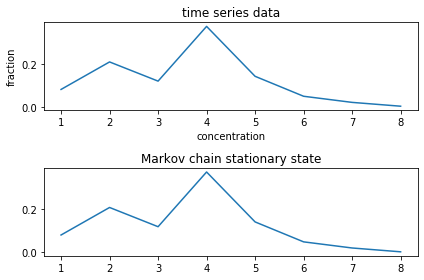

In [53]:
state = np.linspace(1, 8, 8)
fig, axs = plt.subplots(2)
axs[0].plot(countSeries.index.tolist(), list_frac)
axs[0].set_title("time series data")
axs[0].set_xlabel("concentration")
axs[0].set_ylabel("fraction")

axs[1].plot(state,stationary_dis)
axs[1].set_title("Markov chain stationary state")
fig.tight_layout()
plt.show()

In [63]:
markov_chain = []

def simulate_markov():
    n = 1001
    start_state = 4 # according to the actual data
    prev_state = start_state

    while n-1:
        curr_state = np.random.choice([1,2,3,4,5,6,7,8], p = transition_matrix[prev_state - 1])
        markov_chain.append(curr_state)
        prev_state = curr_state
        n -= 1
    return markov_chain

simulate_markov()
print(markov_chain)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 8, 5, 5, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 3, 3, 3, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

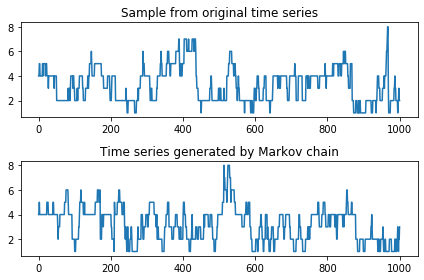

In [55]:
# graph the sample from original data comparing with the one generated by Markov Chain
time = np.linspace(0,1000,1000)
fig,axs = plt.subplots(2)
axs[0].plot(time, data['State'].iloc[ : 1000])
axs[0].set_title("Sample from original time series")

axs[1].plot(time, markov_chain)
axs[1].set_title("Time series generated by Markov chain")
fig.tight_layout()
plt.show()

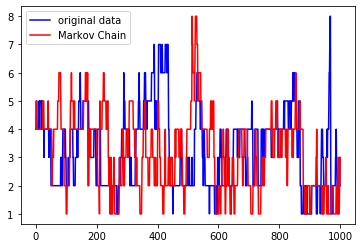

In [56]:
# Put on the same graph

plt.plot(time, data['State'].iloc[ : 1000], 'b',label = 'original data' )
plt.plot(time, markov_chain, 'r', label = 'Markov Chain')
plt.legend()
plt.show()


origin data:  [1.     0.9286 0.8636 0.8005 0.7442 0.6913 0.6476 0.6141 0.5831 0.5521
 0.5256]
markov chain:  [1.     0.9384 0.8846 0.8331 0.7866 0.7364 0.6936 0.6453 0.5954 0.5477
 0.5069]


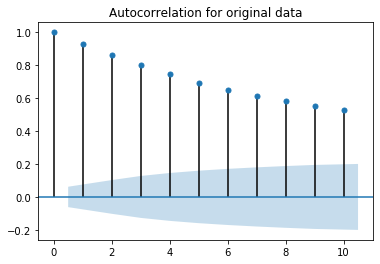

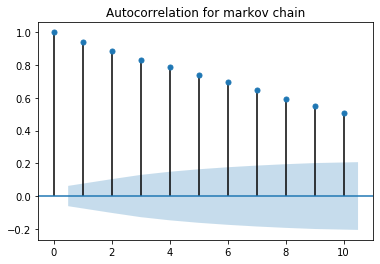

In [65]:
#try statsmodels.tsa.stattools.acf()
x = np.arange(11)
# for original data:
R_origin = acf(data['State'].iloc[ : 1000], nlags = 10)

print("origin data: ",R_origin)

R_markov = acf(markov_chain, nlags = 10)
print("markov chain: ",R_markov)

plot_acf(data['State'].iloc[ : 1000], lags = 10, title = "Autocorrelation for original data")
plot_acf(markov_chain, lags = 10, title = "Autocorrelation for markov chain")
plt.show()

In [58]:
# Calculate the jumps (two steps) between each states 
def twoJumpsBetween():
    pair_states = tuple(zip(data['State'], data['State'].iloc[2:]))
    my_dic = {i: pair_states.count(i) for i in pair_states}
    return my_dic

twoJumpsBetween()

{(4, 5): 1384,
 (5, 4): 1175,
 (4, 4): 12341,
 (5, 5): 4028,
 (4, 3): 1305,
 (3, 4): 1642,
 (4, 2): 511,
 (2, 2): 5859,
 (2, 3): 1343,
 (3, 2): 1057,
 (3, 3): 2231,
 (2, 4): 372,
 (5, 6): 542,
 (6, 4): 73,
 (2, 1): 1144,
 (1, 1): 2120,
 (1, 2): 1203,
 (4, 6): 43,
 (6, 5): 457,
 (6, 6): 1265,
 (6, 7): 217,
 (7, 5): 31,
 (7, 4): 18,
 (5, 7): 32,
 (7, 7): 569,
 (7, 6): 198,
 (1, 3): 39,
 (3, 5): 16,
 (5, 2): 82,
 (6, 8): 8,
 (7, 8): 47,
 (8, 3): 2,
 (8, 1): 1,
 (3, 1): 54,
 (5, 3): 62,
 (3, 6): 3,
 (6, 3): 19,
 (5, 8): 4,
 (8, 5): 5,
 (4, 8): 2,
 (8, 4): 3,
 (4, 1): 52,
 (2, 5): 11,
 (6, 2): 17,
 (2, 6): 4,
 (1, 5): 6,
 (8, 8): 64,
 (8, 7): 46,
 (1, 4): 17,
 (7, 2): 4,
 (5, 1): 13,
 (4, 7): 5,
 (8, 6): 4,
 (6, 1): 3,
 (7, 3): 2}

In [59]:
# matrix for 2-steps jump frequency
x1_s2 = 3385 # since the last and second last states are 2, so need to be 3387-2

n1 = [2120/x1_s2, 1203/x1_s2, 39/x1_s2, 17/x1_s2, 6/x1_s2, 0/x1_s2, 0/x1_s2, 0/x1_s2]
n2 = [1144/x2, 5859/x2,1343/x2,372/x2,11/x2, 4/x2, 0/x2, 0/x2 ]
n3 = [54/x3, 1057/x3, 2231/x3, 1642/x3, 16/x3, 3/x3, 0/x3, 0/x3 ]
n4 = [52/x4, 511/x4, 1305/x4, 12341/x4, 1384/x4, 43/x4, 5/x4, 2/x4 ]
n5 = [13/x5, 82/x5, 62/x5, 1175/x5, 4028/x5, 542/x5, 32/x5, 4/x5 ]
n6 = [3/x6, 17/x6, 19/x6, 73/x6, 457/x6, 1265/x6, 217/x6, 8/x6 ]
n7 = [0/x7, 4/x7, 2/x7, 18/x7, 31/x7, 198/x7, 569/x7, 47/x7 ]
n8 = [1/x8, 0/x8, 2/x8, 3/x8, 5/x8, 4/x8, 46/x8, 64/x8 ]

# Transition Matrix Nij for 2-steps jump
np.set_printoptions(precision = 4, suppress = True)
N_ij = np.array([n1, n2, n3, n4, n5, n6, n7, n8])
print(N_ij)


[[0.6263 0.3554 0.0115 0.005  0.0018 0.     0.     0.    ]
 [0.131  0.6709 0.1538 0.0426 0.0013 0.0005 0.     0.    ]
 [0.0108 0.2113 0.4459 0.3282 0.0032 0.0006 0.     0.    ]
 [0.0033 0.0327 0.0834 0.7889 0.0885 0.0027 0.0003 0.0001]
 [0.0022 0.0138 0.0104 0.1979 0.6783 0.0913 0.0054 0.0007]
 [0.0015 0.0083 0.0092 0.0355 0.222  0.6144 0.1054 0.0039]
 [0.     0.0046 0.0023 0.0207 0.0357 0.2278 0.6548 0.0541]
 [0.008  0.     0.016  0.024  0.04   0.032  0.368  0.512 ]]


In [60]:
# Calculate the two-steps transition matrix as q_ij, using square of orginial transition matrix
q_ij = np.linalg.matrix_power(transition_matrix,2)
print(q_ij)

[[0.5485 0.4072 0.0358 0.0073 0.0012 0.0001 0.     0.    ]
 [0.155  0.6365 0.1557 0.0502 0.0021 0.0004 0.     0.    ]
 [0.0239 0.2421 0.3864 0.3329 0.0144 0.0004 0.     0.    ]
 [0.0031 0.0338 0.0955 0.7695 0.0924 0.0052 0.0004 0.0001]
 [0.0013 0.0082 0.0139 0.2303 0.6455 0.0941 0.0062 0.0006]
 [0.0003 0.0034 0.005  0.0486 0.2478 0.5829 0.1079 0.0042]
 [0.     0.0003 0.0009 0.0087 0.0537 0.2396 0.6389 0.0578]
 [0.0001 0.0015 0.0104 0.0079 0.0638 0.0434 0.3892 0.4837]]


In [61]:

# Calculate Ni: sum of each row of N_ij matrix
Ni = []
def cal_Ni():
    for j in N_ij:
        Ni.append(np.around(sum(j), 4))
    return Ni

cal_Ni()
print("Ni = " ,Ni)

# Calculte M_ij = Ni * q_ij
M_ij = []
def cal_M():
    for i in range(len(Ni)):
        M_ij.append([])
        for j in range(len(q_ij[0])):
            M_ij[i].append(np.around(Ni[i] * q_ij[i][j],4))
    return M_ij
    
cal_M()
print("Mij = ",M_ij)

Ni =  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mij =  [[0.5485, 0.4072, 0.0358, 0.0073, 0.0012, 0.0001, 0.0, 0.0], [0.155, 0.6365, 0.1557, 0.0502, 0.0021, 0.0004, 0.0, 0.0], [0.0239, 0.2421, 0.3864, 0.3329, 0.0144, 0.0004, 0.0, 0.0], [0.0031, 0.0338, 0.0955, 0.7695, 0.0924, 0.0052, 0.0004, 0.0001], [0.0013, 0.0082, 0.0139, 0.2303, 0.6455, 0.0941, 0.0062, 0.0006], [0.0003, 0.0034, 0.005, 0.0486, 0.2478, 0.5829, 0.1079, 0.0042], [0.0, 0.0003, 0.0009, 0.0087, 0.0537, 0.2396, 0.6389, 0.0578], [0.0001, 0.0015, 0.0104, 0.0079, 0.0638, 0.0434, 0.3892, 0.4837]]


In [62]:
# chi-square test: obeserved frequency: Nij, expected frequency: Mij

# H0: two fits well, H1: not fits well 
#If p-value >0.05 -> H0, p-value <0.05 -> H1

# only need the entries which is positive (non-zero), need to clean up the matrix for each row and 
#calculate chi-square


print("chi square for state 1: ", chisquare([0.6263, 0.3554, 0.0115, 0.005,0.0018, 0.] , 
          f_exp =[0.5485, 0.4072, 0.0358, 0.0073, 0.0012, 0.0001]))

print("chi square for state 2: ", chisquare([0.131, 0.6709, 0.1538, 0.0426, 0.0013, 0.0005] , 
          f_exp =[0.155, 0.6365, 0.1557, 0.0502, 0.0021, 0.0004]))

print("chi square for state 3: ", chisquare([0.0108, 0.2113, 0.4459, 0.3282, 0.0032, 0.0006] , 
          f_exp =[0.0239, 0.2421, 0.3864, 0.3329, 0.0144, 0.0004]))

print("chi square for state 4: ", chisquare([0.0033, 0.0327, 0.0834, 0.7889, 0.0885, 0.0027, 0.0003, 0.0001] , 
          f_exp =[0.0031, 0.0338, 0.0955, 0.7695, 0.0924, 0.0052, 0.0004, 0.0001]))

print("chi square for state 5: ", chisquare([0.0022, 0.0138, 0.0104, 0.1979, 0.6783, 0.0913, 0.0054, 0.0007] , 
          f_exp =[0.0013, 0.0082, 0.0139, 0.2303, 0.6455, 0.0941, 0.0062, 0.0006]))

print("chi square for state 6: ", chisquare([0.0015, 0.0083, 0.0092, 0.0355, 0.222, 0.6144, 0.1054, 0.0039] , 
          f_exp =[0.0003, 0.0034, 0.005, 0.0486, 0.2478, 0.5829, 0.1079, 0.0042]))

print("chi square for state 7: ", chisquare([0.0046, 0.0023, 0.0207, 0.0357, 0.2278, 0.6548, 0.0541] , 
          f_exp =[0.0003, 0.0009, 0.0087, 0.0537, 0.2396, 0.6389, 0.0578]))

print("chi square for state 8: ", chisquare([0.008, 0., 0.016, 0.024, 0.04, 0.032, 0.368, 0.512] , 
          f_exp =[0.0001, 0.0015, 0.0104, 0.0079, 0.0638, 0.0434, 0.3892, 0.4837]))

#p-values are all greater than 0.05, fits well with the expected frequency



chi square for state 1:  Power_divergenceResult(statistic=0.03524354060641094, pvalue=0.999987751462477)
chi square for state 2:  Power_divergenceResult(statistic=0.007078841481229051, pvalue=0.9999997763049218)
chi square for state 3:  Power_divergenceResult(statistic=0.029138320617812054, pvalue=0.9999923705596081)
chi square for state 4:  Power_divergenceResult(statistic=0.0034624213302579315, pvalue=0.9999999999814648)
chi square for state 5:  Power_divergenceResult(statistic=0.011756875618125414, pvalue=0.9999999986671322)
chi square for state 6:  Power_divergenceResult(statistic=0.023388650326453396, pvalue=0.9999999852660363)
chi square for state 7:  Power_divergenceResult(statistic=0.08761003696559391, pvalue=0.9999864428685025)
chi square for state 8:  Power_divergenceResult(statistic=0.676110153707457, pvalue=0.9985126368198176)
